<a href="https://colab.research.google.com/github/mfdsouza/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_(Roma).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Roma*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Roma, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [4]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
DATA = "http://data.insideairbnb.com/italy/lazio/rome/2022-12-13/visualisations/listings.csv"
df = pd.read_csv(DATA)

## Análise dos Dados


**Dicionário das variáveis**

* id - identificador do imóvel
* name - nome da propriedade
* host_id	- id do proprietario
* host_name	- nome do proprietario
* neighbourhood_group	 - nao identificável pelos dados - talvez macro-região
* neighbourhood	- bairro
* latitude	- latitude da propriedade
* longitude	- longitude da propriedade
* room_type	- tipo de propriedade
* price	- preço do aluguel
* minimum_nights	- numero minimo de noites para reserva
* number_of_reviews	- numero de feedbacks
* last_review	- data da última avaliação
* reviews_per_month	- número de avaliações por periodo
* calculated_host_listings_count - numero de imoveis do mesmo proprietario
* availability_365 - dias de disponibilidade no ano	
* number_of_reviews_ltm	- numero de avaliações do ultimo mes
* license - nao identificável pelos dados 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87136,12.48215,Private room,45,7,7,2015-05-28,0.07,6,365,0,NaN
1,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89500,12.49117,Entire home/apt,90,20,21,2022-04-30,0.14,5,284,2,NaN
2,11834,"Rome ""Charming Boschetto Studio""",44552,Serena,NaN,I Centro Storico,41.89650,12.49211,Entire home/apt,100,2,173,2022-11-15,1.22,1,349,31,NaN
3,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92582,12.46928,Entire home/apt,81,1,44,2022-08-10,0.30,1,294,1,NaN
4,19965,DI FRONTE AI MUSEI VATICANI 2 CAMERE DA LETTO,75450,Sasa,NaN,I Centro Storico,41.90730,12.45349,Entire home/apt,96,3,95,2022-11-01,0.71,9,43,33,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

R: Foram encontradas 24383 entradas e cada registro possui 18 variáveis. As variáveis são dos seguintes tipos: int, float e string.

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24383
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

R: 
* É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
* A variável license tem aproximadamente 84% das linhas nulas.
* As variáveis reviews_per_month e last_review possuem valores nulos em quase 15% das linhas.
* As variáveis name e host_name têm aproximadamente 0,01% dos valores nulos.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.833737
reviews_per_month                 0.142722
last_review                       0.142722
name                              0.000123
host_name                         0.000041
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

R: Um histograma será plotado para identificar a distribuição das variáveis.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'neighbourhood_group'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>]],
      dtype=object)

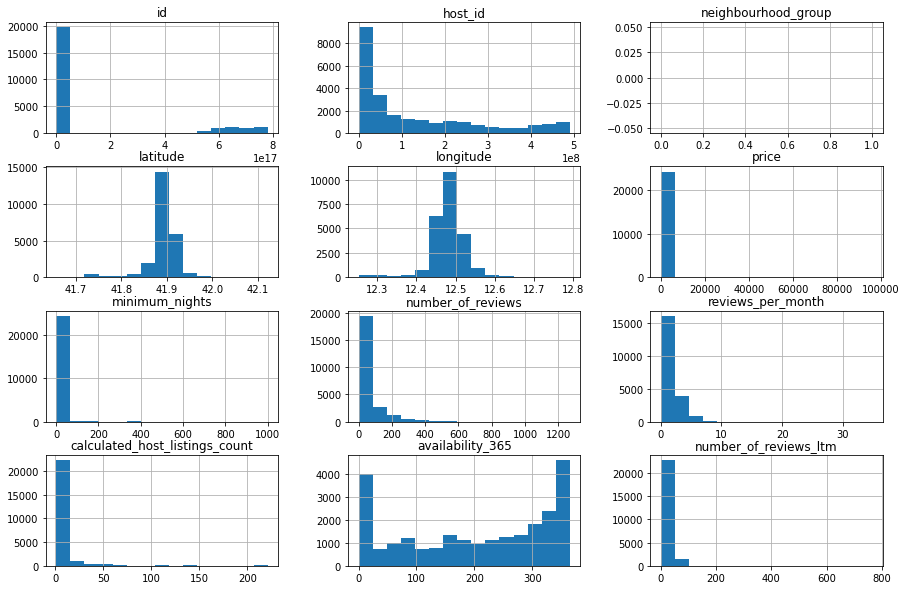

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))



### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [11]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24383.000000,24383.000000,24383.000000,20903.000000,24383.000000,24383.000000
mean,235.622893,3.534143,52.690481,1.501749,8.566583,201.703359
std,2261.046815,18.789018,83.175115,1.536501,25.505180,129.258852
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,65.000000,1.000000,3.000000,0.330000,1.000000,79.000000
50%,92.000000,2.000000,18.000000,1.000000,3.000000,226.000000
75%,140.000000,3.000000,66.000000,2.220000,6.000000,327.000000
max,96160.000000,999.000000,1270.000000,34.830000,221.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 140, porém seu valor máximo é 96160.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


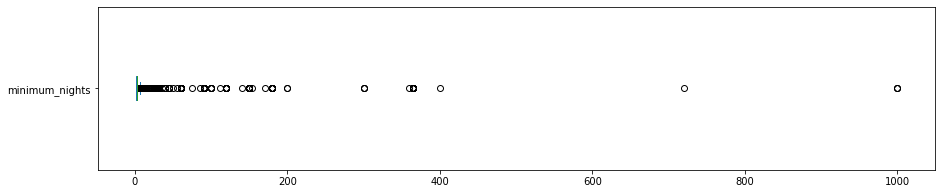

minimum_nights: valores acima de 30:
172 entradas
0.7054%


In [12]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

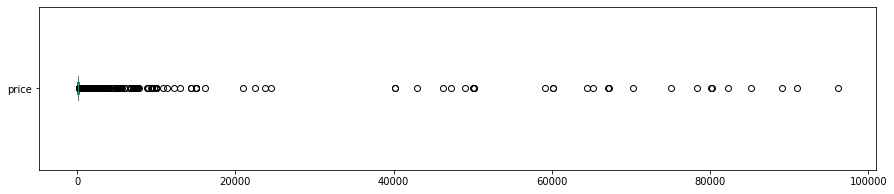


price: valores acima de 1500
216 entradas
0.8859%


In [13]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

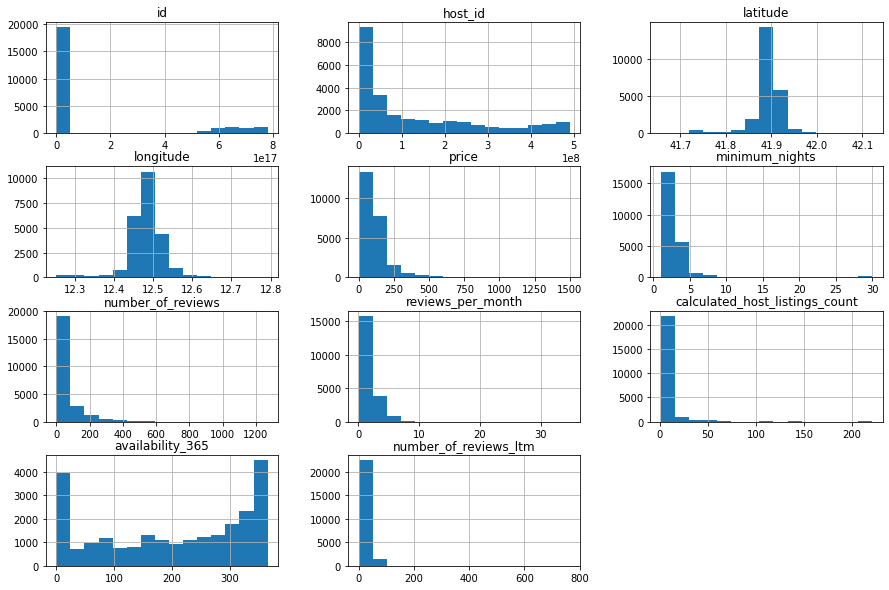

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025144,-0.089105,-0.099673,0.153671,0.061169
minimum_nights,-0.025144,1.000000,-0.036885,-0.109514,-0.055558,-0.065878
number_of_reviews,-0.089105,-0.036885,1.000000,0.535004,-0.048638,0.006358
reviews_per_month,-0.099673,-0.109514,0.535004,1.000000,-0.004085,0.096290
calculated_host_listings_count,0.153671,-0.055558,-0.048638,-0.004085,1.000000,-0.064505
availability_365,0.061169,-0.065878,0.006358,0.096290,-0.064505,1.000000


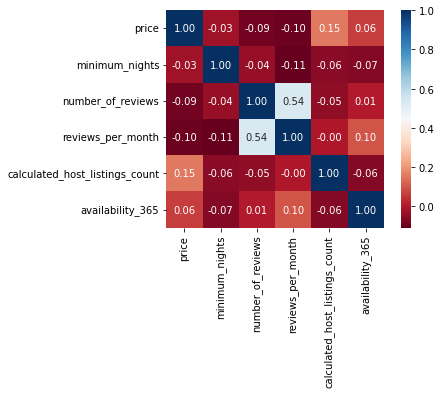

In [16]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual a média dos preços de aluguel?**

R: A média de preço dos imóveis AirBnB em Roma é de aproximadamente 236.

In [17]:
# ver a média da coluna `price``
df.price.mean()

235.62289299922077

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

R: Apês inteiros (68% procurados).

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16307
Private room        6860
Hotel room           697
Shared room          134
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.679515
Private room       0.285857
Hotel room         0.029044
Shared room        0.005584
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Roma?**



R: A localidade mais cara de Roma é I Centro Storico (150 por noite).

In [20]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              149.073729
IX Eur                        129.919298
XV Cassia/Flaminia            122.738095
XIII Aurelia                  116.713272
II Parioli/Nomentano          110.700495
XIV Monte Mario               103.223404
III Monte Sacro                98.964865
XII Monte Verde                96.414211
VIII Appia Antica              96.150621
VII San Giovanni/Cinecittà     92.583787
Name: price, dtype: float64

Quantidade de imóveis de I Centro Storixo

In [22]:
# ver quantidade de imóveis no I Centro Storico
print(df_clean[df_clean.neighbourhood == "I Centro Storico"].shape)

(13509, 17)


In [23]:
# ver as 3 entradas do I Centro Storico
df_clean[df_clean.neighbourhood == "I Centro Storico"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,I Centro Storico,41.895000,12.491170,Entire home/apt,90,20,21,2022-04-30,0.14,5,284,2,NaN
2,11834,"Rome ""Charming Boschetto Studio""",44552,Serena,I Centro Storico,41.896500,12.492110,Entire home/apt,100,2,173,2022-11-15,1.22,1,349,31,NaN
4,19965,DI FRONTE AI MUSEI VATICANI 2 CAMERE DA LETTO,75450,Sasa,I Centro Storico,41.907300,12.453490,Entire home/apt,96,3,95,2022-11-01,0.71,9,43,33,NaN
5,19967,A 5 MIN A PIEDI P.ZZA S. PIETRO 2 CAMERE SPAZIOSO,75450,Sasa,I Centro Storico,41.908283,12.452617,Entire home/apt,97,3,41,2022-10-15,0.37,9,165,9,NaN
6,20534,DormiRoma - Cedro 1 Apartment - Trastevere,77540,Adriano,I Centro Storico,41.889920,12.468230,Entire home/apt,130,3,52,2022-11-22,0.35,5,351,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24376,779478748968440660,Comfort e Pulizia al TOP,491012752,Andrea,I Centro Storico,41.912232,12.467885,Private room,127,1,0,NaN,NaN,2,365,0,NaN
24377,779496420970966469,singola 1,491012752,Andrea,I Centro Storico,41.912232,12.467885,Private room,76,1,0,NaN,NaN,2,356,0,NaN
24378,779552381059690347,Camera matrimoniale Trastevere,19444683,Alice,I Centro Storico,41.890398,12.470885,Private room,100,1,0,NaN,NaN,2,320,0,NaN
24379,779557620810535438,apartment 2 levels in center,245357731,Mikhail,I Centro Storico,41.906710,12.501616,Entire home/apt,141,1,0,NaN,NaN,7,359,0,11864


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

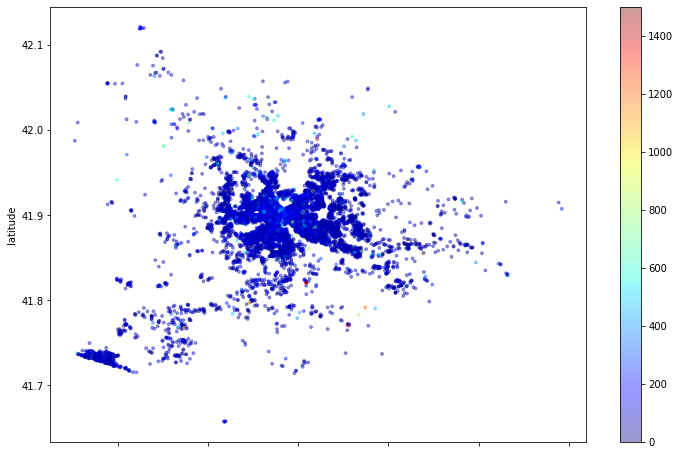

In [21]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

R: aproximadamente 3 noites.

In [24]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.534142640364188

## Conclusões



Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.